In [38]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import keras

# Import the RMSprop optimizer
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import layers

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Binary Classification

### Listing 4.1 Loading the E-Commerce dataset

In [51]:
# Load the dataset
url = "https://raw.githubusercontent.com/RoroDuran23/irisDS_CPSC393_ML/main/Womens%20Clothing%20E-Commerce%20Reviews.csv?token=GHSAT0AAAAAACJR55EKTPNXD4BQBJHLQ4HAZJ7GQPQ"
ecom = pd.read_csv(url)

In [52]:
# Drop null values
ecom.dropna(inplace=True)

In [53]:
X = ecom['Review Text']
y = ecom['Recommended IND']

In [54]:
X = [str(text) for text in X]

In [55]:
# Tokenize the text
max_words = 10000  # Set the maximum number of words to consider
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(X)

# Convert text to sequences of integers
X = tokenizer.texts_to_sequences(X)

In [56]:
max_sequence_length = 200  # Set the maximum sequence length
padded_sequences = pad_sequences(X, maxlen=max_sequence_length, padding='post', truncating='post')

In [57]:
train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size=0.3, random_state=42)

In [58]:
train_data[0]

[55, 141, 19, 8, 7, 5, 524, 238, 6, 68, 30, 305, 45, 37, 82]

In [59]:
# Reset Labels
train_labels = train_labels.reset_index(drop=True)

In [62]:
train_labels[0]

1

In [63]:
max([max(sequence) for sequence in train_data])

9995

### Listing 4.2 Decoding reviews back to text

In [64]:
# Access the word_index
word_index = tokenizer.word_index

In [65]:
# Create a reverse word index Ids back to words
reverse_word_index = {v: k for k, v in word_index.items()}

In [66]:
# Decode the first training sample (train_data[0]) back to words
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in X[0]])

print(decoded_newswire)

 the size feel underneath type <OOV> surprised 135 hot kinds go patterns mesh the mark purchased nor for ? kinds go type coverage satisfied 5'4 ? needed i inside


### Listing 4.3 Encoding the integer sequences via multi-hot encoding

In [67]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1
    return results

In [68]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [69]:
x_train[0]

array([0., 0., 0., ..., 0., 0., 0.])

Vectorize Labels

In [70]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Listing 4.4 Model definition

In [71]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

### Listing 4.5 Compiling the model

In [72]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Listing 4.6 Setting aside a validation set

In [73]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

### Listing 4.7 Training your model

In [74]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=200,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/200
8/8 [==============================] - 4s 441ms/step - loss: 0.6909 - accuracy: 0.7313 - val_loss: 0.6885 - val_accuracy: 0.8213
Epoch 2/200
8/8 [==============================] - 1s 139ms/step - loss: 0.6873 - accuracy: 0.8196 - val_loss: 0.6855 - val_accuracy: 0.8213
Epoch 3/200
8/8 [==============================] - 1s 146ms/step - loss: 0.6844 - accuracy: 0.8196 - val_loss: 0.6828 - val_accuracy: 0.8213
Epoch 4/200
8/8 [==============================] - 1s 148ms/step - loss: 0.6818 - accuracy: 0.8196 - val_loss: 0.6803 - val_accuracy: 0.8213
Epoch 5/200
8/8 [==============================] - 2s 244ms/step - loss: 0.6794 - accuracy: 0.8196 - val_loss: 0.6778 - val_accuracy: 0.8213
Epoch 6/200
8/8 [==============================] - 1s 122ms/step - loss: 0.6769 - accuracy: 0.8196 - val_loss: 0.6753 - val_accuracy: 0.8213
Epoch 7/200
8/8 [==============================] - 1s 74ms/step - loss: 0.6744 - accuracy: 0.8196 - val_loss: 0.6728 - val_accuracy: 0.8213
Epoch 8/200
8/

In [75]:
history_dict = history.history

In [76]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Listing 4.8 Plotting the training and validation loss

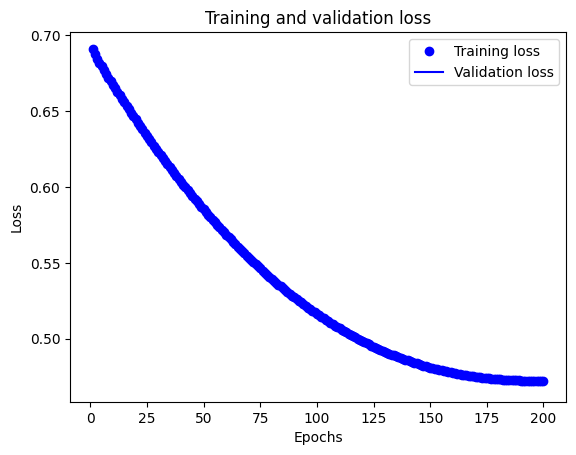

In [77]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Listing 4.9 Plotting the training and validation accuracy

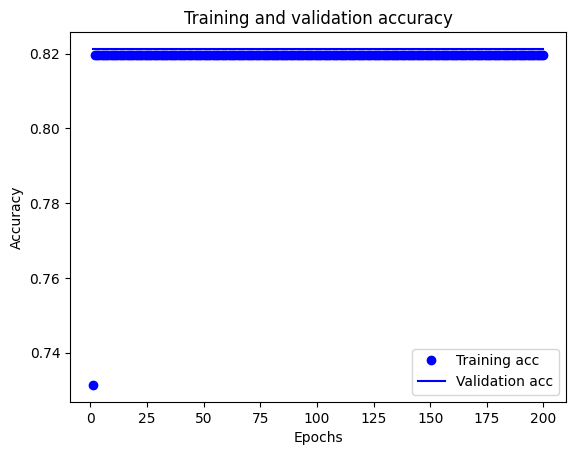

In [78]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Listing 4.10 Retraining a model from scratch

In [79]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=38, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/38
27/27 [==============================] - 2s 40ms/step - loss: 0.6867 - accuracy: 0.7989
Epoch 2/38
27/27 [==============================] - 1s 29ms/step - loss: 0.6591 - accuracy: 0.8208
Epoch 3/38
27/27 [==============================] - 1s 29ms/step - loss: 0.6241 - accuracy: 0.8208
Epoch 4/38
27/27 [==============================] - 1s 29ms/step - loss: 0.5894 - accuracy: 0.8208
Epoch 5/38
27/27 [==============================] - 1s 30ms/step - loss: 0.5564 - accuracy: 0.8208
Epoch 6/38
27/27 [==============================] - 1s 30ms/step - loss: 0.5262 - accuracy: 0.8208
Epoch 7/38
27/27 [==============================] - 1s 29ms/step - loss: 0.5018 - accuracy: 0.8208
Epoch 8/38
27/27 [==============================] - 1s 29ms/step - loss: 0.4841 - accuracy: 0.8208
Epoch 9/38
27/27 [==============================] - 1s 30ms/step - loss: 0.4742 - accuracy: 0.8208
Epoch 10/38
27/27 [==============================] - 1s 30ms/step - loss: 0.4706 - accuracy: 0.8208
Epoch 11/

In [80]:
results

[0.4835375249385834, 0.8120020627975464]

### 4.1.5 Using a trained model to generate predictions on new data

In [81]:
predictions = model.predict(x_test)

185/185 [==============================] - 1s 2ms/step


### Further Experiments

In [82]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=38, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/38
27/27 [==============================] - 1s 31ms/step - loss: 0.2450 - accuracy: 0.7974
Epoch 2/38
27/27 [==============================] - 1s 29ms/step - loss: 0.2346 - accuracy: 0.8208
Epoch 3/38
27/27 [==============================] - 1s 28ms/step - loss: 0.2247 - accuracy: 0.8208
Epoch 4/38
27/27 [==============================] - 1s 28ms/step - loss: 0.2147 - accuracy: 0.8208
Epoch 5/38
27/27 [==============================] - 1s 28ms/step - loss: 0.2049 - accuracy: 0.8208
Epoch 6/38
27/27 [==============================] - 1s 28ms/step - loss: 0.1953 - accuracy: 0.8208
Epoch 7/38
27/27 [==============================] - 1s 28ms/step - loss: 0.1863 - accuracy: 0.8208
Epoch 8/38
27/27 [==============================] - 1s 28ms/step - loss: 0.1780 - accuracy: 0.8208
Epoch 9/38
27/27 [==============================] - 1s 28ms/step - loss: 0.1706 - accuracy: 0.8208
Epoch 10/38
27/27 [==============================] - 1s 28ms/step - loss: 0.1642 - accuracy: 0.8208
Epoch 11/

In [83]:
results

[0.1527402698993683, 0.8120020627975464]

# Multiclass Classification

### Listing 4.11 Loading the Reuters dataset

In [136]:
# Load the dataset (replace with your dataset URL)
url = "https://raw.githubusercontent.com/RoroDuran23/irisDS_CPSC393_ML/main/tripadvisor_hotel_reviews.csv?token=GHSAT0AAAAAACJR55ELD5FID2AKZTEBVHAYZJ7IATQ"
trip = pd.read_csv(url)

In [137]:
# Drop null values
trip.dropna(inplace=True)

In [138]:
X = trip['Review']
y = trip['Rating'] - 1 # Adjust for Python starting at zero

In [139]:
# Tokenize the text
max_words = 10000  # Set the maximum number of words to consider
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(X)

# Convert text to sequences of integers
X = tokenizer.texts_to_sequences(X)

In [140]:
max_sequence_length = 200  # Set the maximum sequence length
padded_sequences = pad_sequences(X, maxlen=max_sequence_length, padding='post', truncating='post')

In [141]:
max_sequence_length = 200  # Set the maximum sequence length
padded_sequences = pad_sequences(X, maxlen=max_sequence_length, padding='post', truncating='post')

In [142]:
train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size=0.3, random_state=42)

In [143]:
len(train_data)

14343

In [144]:
len(test_data)

6148

In [145]:
train_data[10]

[5,
 2,
 38,
 681,
 16,
 44,
 58,
 167,
 453,
 37,
 2166,
 3761,
 92,
 63,
 123,
 1,
 480,
 1,
 195,
 1559,
 1,
 2744,
 79,
 195,
 168,
 1278,
 2,
 1629,
 141,
 901,
 269,
 124,
 901,
 3446,
 46,
 24,
 1931]

### Listing 4.12 Decoding newswires back to text

In [146]:
# Access the word_index
word_index = tokenizer.word_index

In [147]:
# Create a reverse word index Ids back to words
reverse_word_index = {v: k for k, v in word_index.items()}

In [148]:
# Decode the first training sample (train_data[0]) back to words
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in X[0]])

print(decoded_newswire)

stay ? fine does small not la n't ? museum lot included towels problem district taking booked good choices does comfortable poor amazing friendly french working vieques trip ? ? beach stay different bathroom beautiful chips elan jury thought public <OOV> checkpoint breakfast sick maybe ? location experience based ? japanese suggestions 11pm review pool dishes wasnt bathrooms staff centre secluded ps spa motel stay good <OOV> axel n't stay 24 variety mean eat gets nice hotel took highly having quiet stay days come work executive does location


In [149]:
train_labels[10]

1

### Listing 4.13 Encoding the input data

In [155]:
# Tokenize the training and test data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

### Listing 4.14 Encoding the labels

In [156]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels, num_classes = 5)
y_test = to_categorical(test_labels, num_classes = 5)

### Listing 4.15 Model definition

In [157]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(5, activation="softmax")
])

### Listing 4.16 Compiling the model

In [158]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Listing 4.17 Setting aside a validation set

In [159]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

### Listing 4.18 Training the model

In [160]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=80,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/80
27/27 [==============================] - 2s 61ms/step - loss: 1.5965 - accuracy: 0.4330 - val_loss: 1.5870 - val_accuracy: 0.4540
Epoch 2/80
27/27 [==============================] - 1s 47ms/step - loss: 1.5781 - accuracy: 0.4450 - val_loss: 1.5714 - val_accuracy: 0.4540
Epoch 3/80
27/27 [==============================] - 1s 51ms/step - loss: 1.5620 - accuracy: 0.4450 - val_loss: 1.5564 - val_accuracy: 0.4550
Epoch 4/80
27/27 [==============================] - 1s 46ms/step - loss: 1.5467 - accuracy: 0.4450 - val_loss: 1.5421 - val_accuracy: 0.4550
Epoch 5/80
27/27 [==============================] - 1s 47ms/step - loss: 1.5319 - accuracy: 0.4450 - val_loss: 1.5288 - val_accuracy: 0.4550
Epoch 6/80
27/27 [==============================] - 1s 53ms/step - loss: 1.5179 - accuracy: 0.4450 - val_loss: 1.5158 - val_accuracy: 0.4550
Epoch 7/80
27/27 [==============================] - 2s 83ms/step - loss: 1.5046 - accuracy: 0.4450 - val_loss: 1.5037 - val_accuracy: 0.4550
Epoch 8/80
27

### Listing 4.19 Plotting the training and validation loss

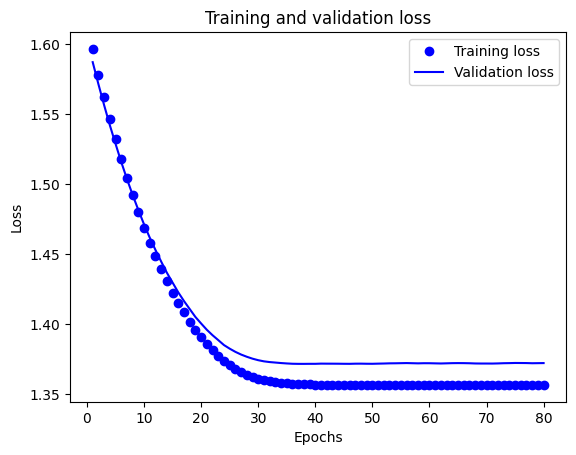

In [161]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Listing 4.20 Plotting the training and validation accuracy

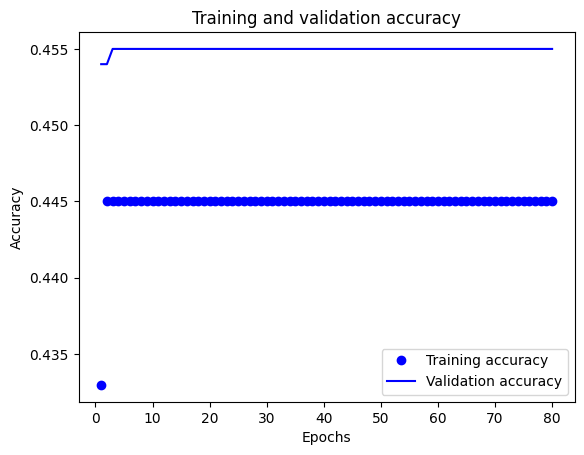

In [162]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Listing 4.21 Retraining a model from scratch

In [163]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
        layers.Dense(5, activation="softmax")
    ])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=25,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/25
29/29 [==============================] - 2s 33ms/step - loss: 1.5957 - accuracy: 0.4324
Epoch 2/25
29/29 [==============================] - 1s 35ms/step - loss: 1.5592 - accuracy: 0.4457
Epoch 3/25
29/29 [==============================] - 1s 34ms/step - loss: 1.5143 - accuracy: 0.4457
Epoch 4/25
29/29 [==============================] - 1s 33ms/step - loss: 1.4658 - accuracy: 0.4457
Epoch 5/25
29/29 [==============================] - 1s 23ms/step - loss: 1.4216 - accuracy: 0.4457
Epoch 6/25
29/29 [==============================] - 1s 24ms/step - loss: 1.3859 - accuracy: 0.4457
Epoch 7/25
29/29 [==============================] - 1s 24ms/step - loss: 1.3658 - accuracy: 0.4457
Epoch 8/25
29/29 [==============================] - 1s 23ms/step - loss: 1.3599 - accuracy: 0.4457
Epoch 9/25
29/29 [==============================] - 1s 23ms/step - loss: 1.3588 - accuracy: 0.4457
Epoch 10/25
29/29 [==============================] - 1s 23ms/step - loss: 1.3582 - accuracy: 0.4457
Epoch 11/

In [164]:
results

[1.3595064878463745, 0.43282368779182434]

In [165]:
import copy
# Convert the Pandas Series to a NumPy array
test_labels_array = test_labels.to_numpy()

# Make a copy of the NumPy array
test_labels_copy = copy.copy(test_labels_array)

# Shuffle the copy of the array
np.random.shuffle(test_labels_copy)

# Calculate the mean
hits_array = test_labels_array == test_labels_copy
hits_array.mean()

0.2983083929733247

### 4.2.5 Generating predictions on new data

In [166]:
predictions = model.predict(x_test)

193/193 [==============================] - 1s 3ms/step


In [167]:
predictions[0].shape

(5,)

In [168]:
np.sum(predictions[0])

1.0

In [169]:
np.argmax(predictions[0])

4

### 4.2.6 A different way to handle the labels and the loss

In [170]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [171]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
        layers.Dense(5, activation="softmax")
    ])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=25,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/25
29/29 [==============================] - 2s 35ms/step - loss: 1.5947 - accuracy: 0.4079
Epoch 2/25
29/29 [==============================] - 1s 25ms/step - loss: 1.5487 - accuracy: 0.4457
Epoch 3/25
29/29 [==============================] - 1s 25ms/step - loss: 1.4996 - accuracy: 0.4457
Epoch 4/25
29/29 [==============================] - 1s 24ms/step - loss: 1.4515 - accuracy: 0.4457
Epoch 5/25
29/29 [==============================] - 1s 25ms/step - loss: 1.4096 - accuracy: 0.4457
Epoch 6/25
29/29 [==============================] - 1s 25ms/step - loss: 1.3787 - accuracy: 0.4457
Epoch 7/25
29/29 [==============================] - 1s 24ms/step - loss: 1.3631 - accuracy: 0.4457
Epoch 8/25
29/29 [==============================] - 1s 25ms/step - loss: 1.3590 - accuracy: 0.4457
Epoch 9/25
29/29 [==============================] - 1s 24ms/step - loss: 1.3580 - accuracy: 0.4457
Epoch 10/25
29/29 [==============================] - 1s 24ms/step - loss: 1.3577 - accuracy: 0.4457
Epoch 11/

In [172]:
results

[1.3583482503890991, 0.43282368779182434]

### Listing 4.22 A model with an information bottleneck

In [173]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(5, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [174]:
model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))

Epoch 1/20
105/105 [==============================] - 3s 19ms/step - loss: 1.5727 - accuracy: 0.4190 - val_loss: 1.5452 - val_accuracy: 0.4540
Epoch 2/20
105/105 [==============================] - 2s 17ms/step - loss: 1.5156 - accuracy: 0.4450 - val_loss: 1.4968 - val_accuracy: 0.4550
Epoch 3/20
105/105 [==============================] - 2s 20ms/step - loss: 1.4702 - accuracy: 0.4450 - val_loss: 1.4584 - val_accuracy: 0.4550
Epoch 4/20
105/105 [==============================] - 3s 25ms/step - loss: 1.4330 - accuracy: 0.4450 - val_loss: 1.4278 - val_accuracy: 0.4550
Epoch 5/20
105/105 [==============================] - 2s 17ms/step - loss: 1.4054 - accuracy: 0.4450 - val_loss: 1.4054 - val_accuracy: 0.4550
Epoch 6/20
105/105 [==============================] - 2s 17ms/step - loss: 1.3857 - accuracy: 0.4450 - val_loss: 1.3900 - val_accuracy: 0.4550
Epoch 7/20
105/105 [==============================] - 2s 17ms/step - loss: 1.3724 - accuracy: 0.4450 - val_loss: 1.3802 - val_accuracy: 0.4550

### Further Experiments

In [175]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
        layers.Dense(5, activation="softmax")
    ])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
# Need to re-run the begining cells to prevent errors
# Problems originates when we transform y_train to an array
model.fit(x_train,
          y_train,
          epochs=25,
          batch_size=16)
results = model.evaluate(x_test, y_test)

In [154]:
results

[1.3585187196731567, 0.43282368779182434]

# Regression

### Listing 4.23 Loading the Poland apartment dataset

In [3]:
# Load the dataset (replace with your dataset URL)
url = "https://raw.githubusercontent.com/RoroDuran23/irisDS_CPSC393_ML/main/apartments_pl_2023_10.csv?token=GHSAT0AAAAAACJR55EKTU7QYSLH2GBIC7FEZJ65S5A"
df = pd.read_csv(url)

In [4]:
# Drop null values
df.dropna(inplace=True)

In [5]:
numeric_features = ['squareMeters', 'rooms', 'floor', 'floorCount', 'buildYear', 'latitude', 'longitude', 'centreDistance', 'poiCount',
                    'schoolDistance', 'clinicDistance', 'postOfficeDistance', 'kindergartenDistance', 'restaurantDistance',
                    'collegeDistance', 'pharmacyDistance']

In [6]:
X = df[numeric_features]
y = df['price']

In [7]:
train_data, test_data, train_targets, test_targets = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
train_data.shape

(1371, 16)

In [8]:
test_data.shape

(588, 16)

In [ ]:
train_targets

### Listing 4.24 Normalizing the data

In [8]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

### Listing 4.25 Model definition

In [9]:
def build_model():
  model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
  ])
  model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
  return model

### Listing 4.26 K-fold validation

In [17]:
k=4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
  print(f"Processing fold #{i}")
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate(
      [train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]],
      axis=0)
  partial_train_targets = np.concatenate(
      [train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]],
      axis=0)
  model = build_model()
  model.fit(partial_train_data, partial_train_targets,
            epochs=num_epochs, batch_size=16, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [18]:
all_scores

[140462.203125, 132476.578125, 141891.65625, 161661.09375]

In [19]:
np.mean(all_scores)

144122.8828125

### Listing 4.27 Saving the validation logs at each fold

In [ ]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
  print(f"Processing fold #{i}")
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate(
      [train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]],
      axis=0)
  partial_train_targets = np.concatenate(
      [train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]],
      axis=0)
  model = build_model()
  history = model.fit(partial_train_data, partial_train_targets,
  validation_data=(val_data, val_targets),
  epochs=num_epochs, batch_size=16, verbose=0)
  mae_history = history.history["val_mae"]
  all_mae_histories.append(mae_history)


Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


### Listing 4.28 Building the history of successive mean K-fold validation scores

In [21]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]


### Listing 4.29 Plotting validation scores

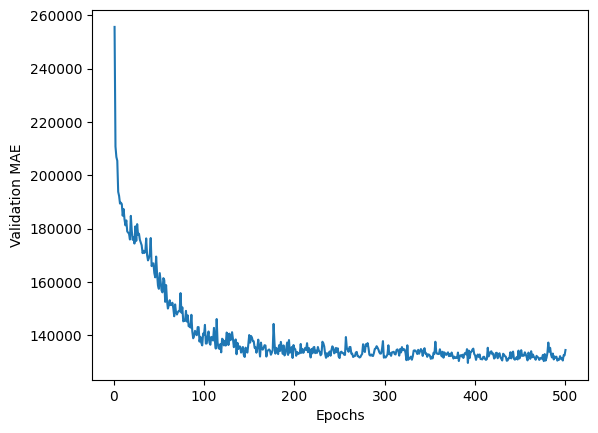

In [22]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()


### Listing 4.30 Plotting validation scores, excluding the first 10 data points

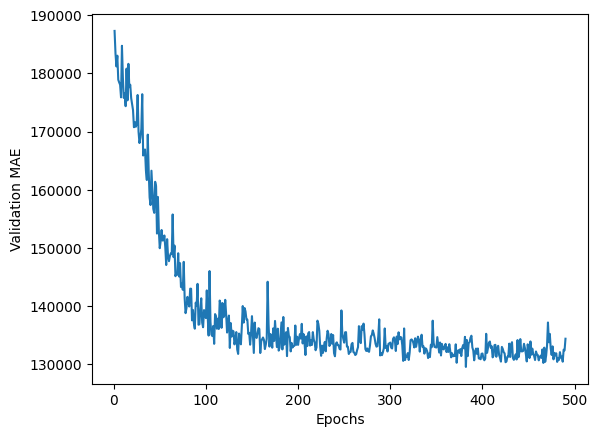

In [23]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

### Listing 4.31 Training the final model

In [24]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=70, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

19/19 [==============================] - 1s 19ms/step - loss: 32021553152.0000 - mae: 123604.6641


In [25]:
test_mae_score

123604.6640625

### 4.3.5 Generating predictions on new data

In [26]:
predictions = model.predict(test_data)
predictions[0]

19/19 [==============================] - 0s 10ms/step


array([547695.56], dtype=float32)

### Further Experiments

In [27]:
def build_model():
  model = keras.Sequential([
        layers.Dense(1024, activation="relu"),
        layers.Dense(1024, activation="relu"),
        layers.Dense(1024, activation="relu"),
        layers.Dense(1024, activation="relu"),
        layers.Dense(1)
  ])
  model.compile(optimizer="adam", loss="mse", metrics=["mae"])
  return model

In [28]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=70, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

19/19 [==============================] - 0s 8ms/step - loss: 31097638912.0000 - mae: 123117.5000


In [29]:
test_mae_score

123117.5

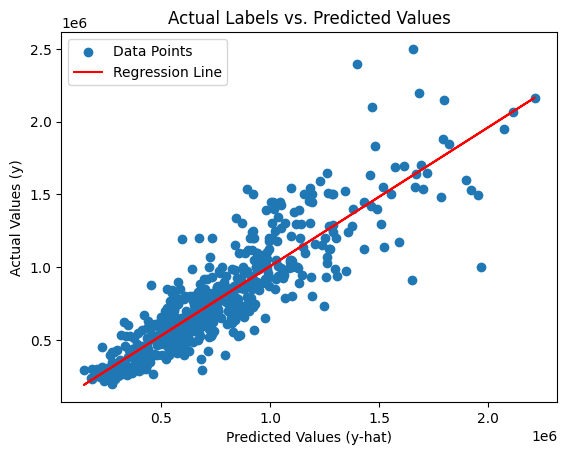

In [37]:
# Flatten data
predictions = np.array(predictions).flatten()
test_targets = np.array(test_targets).flatten()

# Calculate the line of best fit
m, b = np.polyfit(predictions, test_targets, 1)

# Create a scatter plot
plt.scatter(predictions, test_targets, label='Data Points')
plt.xlabel('Predicted Values (y-hat)')
plt.ylabel('Actual Values (y)')

# Plot the line of best fit
plt.plot(predictions, m * predictions + b, color='red', label='Regression Line')

plt.title('Actual Labels vs. Predicted Values')
plt.grid(False)

# Show the plot with a legend
plt.legend()
plt.show()
